# ENS492 Graduation Project - Implementation 

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel("Test_Data2.xlsx", sheet_name="All Tests")

## Basic Features of the Dataset

In [15]:
df.head

<bound method NDFrame.head of         Frequency (Hz)  Selected Magnitude (µm/N)  \
0                  250                   0.182186   
1                  251                   0.186790   
2                  252                   0.175381   
3                  253                   0.188000   
4                  254                   0.193568   
...                ...                        ...   
706348            7996                   0.058097   
706349            7997                   0.057764   
706350            7998                   0.058058   
706351            7999                   0.058251   
706352            8000                   0.058187   

        Curve Fitted Magnitude (µm/N)  Selected Phase (°)  \
0                            0.239099          -18.783766   
1                            0.238311          -14.548362   
2                            0.237533          -12.846889   
3                            0.236767          -12.295075   
4                           

### The column names are modified for efficient usage

In [5]:
df.columns = ['Frequency', 'Selected_Magnitude', 'Curve_Fitted_Magnitude', 'Selected_Phase','Curve_Fitted_Phase', 
              'Diameter', 'Length', 'Accelerometer', 'Test_No']

In [22]:
df.shape

(706353, 9)

### There are 706352 results.

In [23]:
df.dtypes

Frequency                   int64
Selected_Magnitude        float64
Curve_Fitted_Magnitude    float64
Selected_Phase            float64
Curve_Fitted_Phase        float64
Diameter                    int64
Length                      int64
Accelerometer              object
Test_No                    object
dtype: object

### The data types are imported correctly. 

In [24]:
duplicate_rows_all = df[df.duplicated(keep=False)]
print(duplicate_rows_all)


Empty DataFrame
Columns: [Frequency, Selected_Magnitude, Curve_Fitted_Magnitude, Selected_Phase, Curve_Fitted_Phase, Diameter, Length, Accelerometer, Test_No]
Index: []


### There are no duplicate rows. 

In [25]:
print(df.isnull().sum())


Frequency                 0
Selected_Magnitude        0
Curve_Fitted_Magnitude    0
Selected_Phase            0
Curve_Fitted_Phase        0
Diameter                  0
Length                    0
Accelerometer             0
Test_No                   0
dtype: int64


### There aren't any null values. 

### The minimum and maximum values of float type columns (Selected Magnitude, Curve Fitted Magnitude, Selected Phase, Curve Fitted Phase are checked in order to verify correct importation. )

In [26]:
print("Min:", df['Selected_Magnitude'].min())
print("Max:", df['Selected_Magnitude'].max())

Min: 0.0011810651633192
Max: 7.25475700013155


In [27]:
print("Min:", df['Curve_Fitted_Magnitude'].min())
print("Max:", df['Curve_Fitted_Magnitude'].max())

Min: 0.0021911144375159
Max: 7.19247603448189


In [28]:
print("Min:", df['Selected_Phase'].min())
print("Max:", df['Selected_Phase'].max())

Min: -180.0
Max: 179.999756476963


In [29]:
print("Min:", df['Curve_Fitted_Phase'].min())
print("Max:", df['Curve_Fitted_Phase'].max())

Min: -179.999698549165
Max: 179.99983365214


# Exploratory Data Analysis

## Input Features

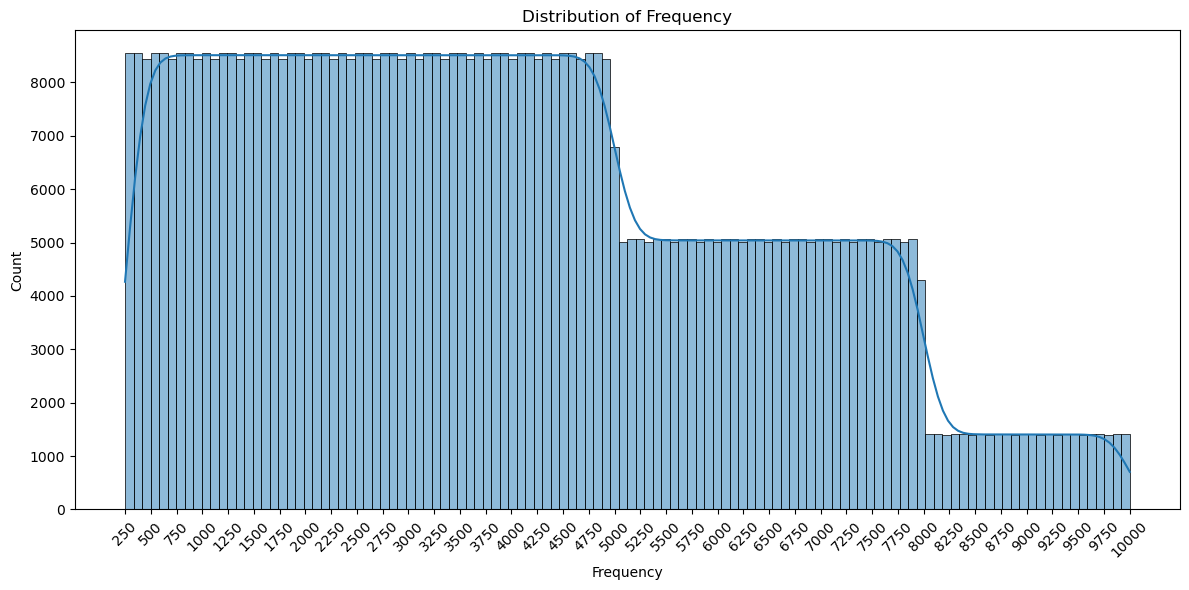

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.histplot(df['Frequency'], kde=True)

plt.xticks(ticks=range(250, int(df['Frequency'].max()) + 250, 250), rotation=45)

plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.tight_layout()

plt.show()



### The frequency used generally ranged from 250 to 5000, going up to 1000 in over 10% of the tests. 

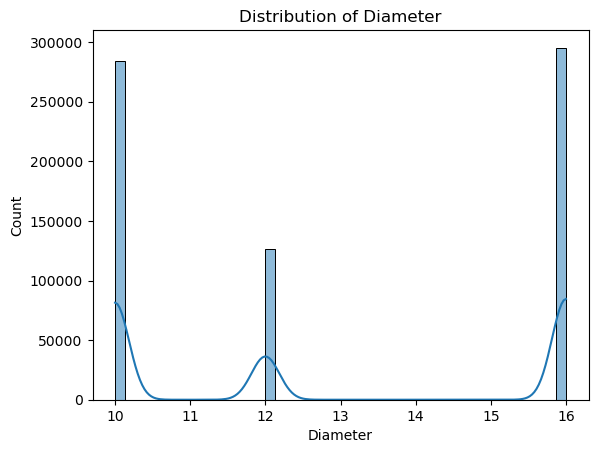

In [37]:
sns.histplot(df['Diameter'], kde=True)

plt.title('Distribution of Diameter')
plt.xlabel('Diameter')
plt.ylabel('Count')

plt.show()

### Tools with 10, 12 and 16 cm diameters were used to conduct the tests. 

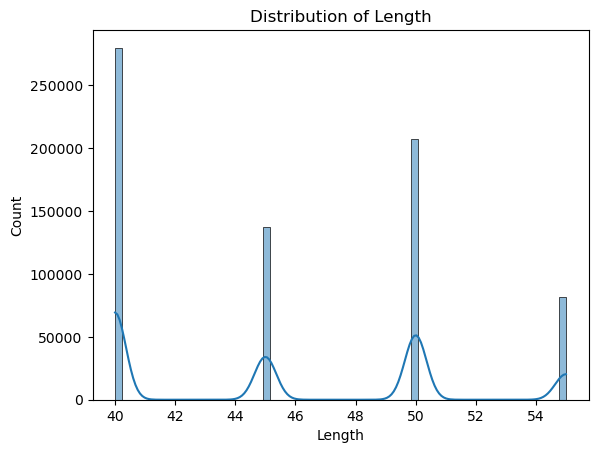

In [38]:
sns.histplot(df['Length'], kde=True)

plt.title('Distribution of Length')
plt.xlabel('Length')
plt.ylabel('Count')

plt.show()

### Tools with 40, 45 ,50 and 55 cm diameters were used to conduct the tests. 

## Output Features

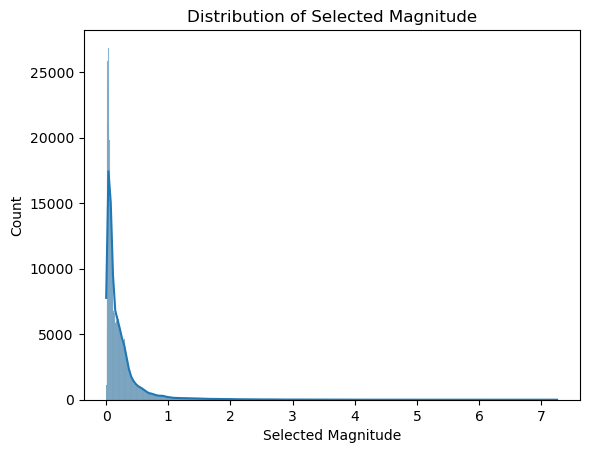

In [40]:
sns.histplot(df['Selected_Magnitude'], kde=True)

plt.title('Distribution of Selected Magnitude')
plt.xlabel('Selected Magnitude')
plt.ylabel('Count')

plt.show()

#### Magnitude has a right-skewed distribution. 

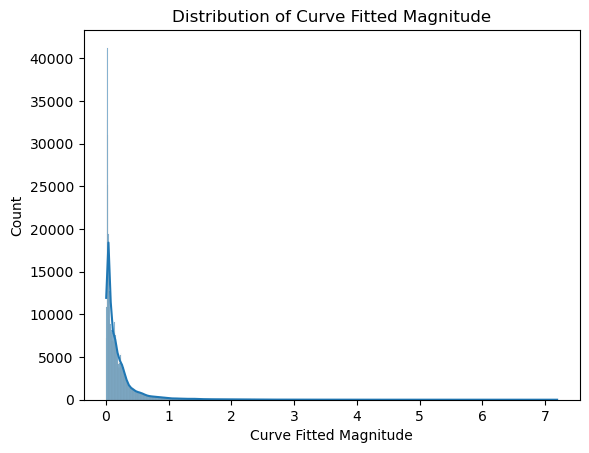

In [42]:
sns.histplot(df['Curve_Fitted_Magnitude'], kde=True)

plt.title('Distribution of Curve Fitted Magnitude')
plt.xlabel('Curve Fitted Magnitude')
plt.ylabel('Count')

plt.show()

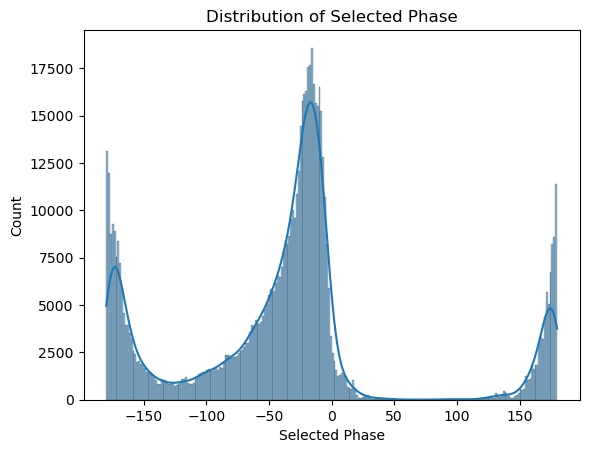

In [43]:
sns.histplot(df['Selected_Phase'], kde=True)

plt.title('Distribution of Selected Phase')
plt.xlabel('Selected Phase')
plt.ylabel('Count')

plt.show()

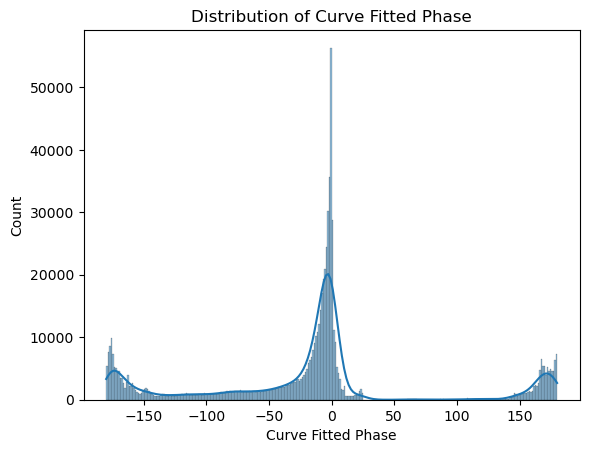

In [45]:
sns.histplot(df['Curve_Fitted_Phase'], kde=True)

plt.title('Distribution of Curve Fitted Phase')
plt.xlabel('Curve Fitted Phase')
plt.ylabel('Count')

plt.show()

## Pairwise Relationships

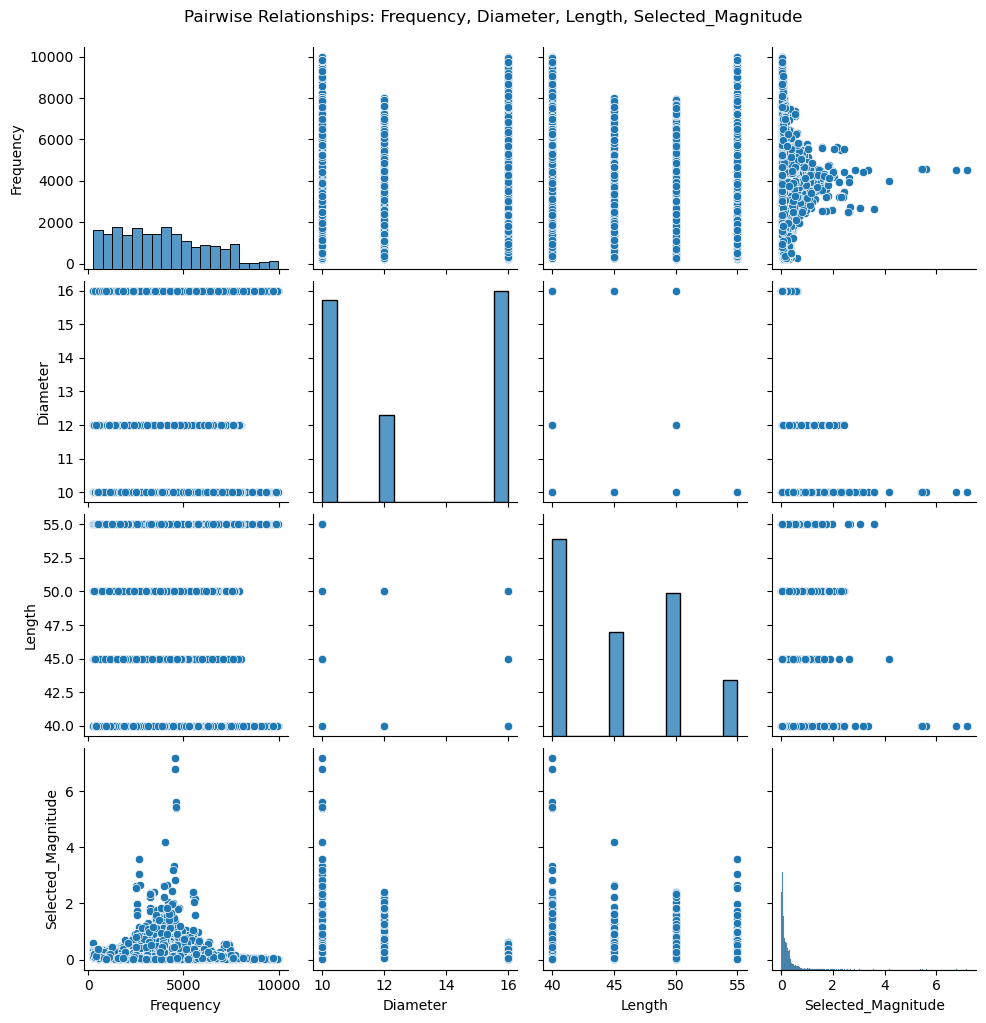

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot_df = df[['Frequency', 'Diameter', 'Length', 'Selected_Magnitude']].copy()


pairplot_df = pairplot_df.sample(n=3000, random_state=42)


sns.pairplot(pairplot_df)

plt.suptitle("Pairwise Relationships: Frequency, Diameter, Length, Selected_Magnitude", y=1.02)
plt.show()


## Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

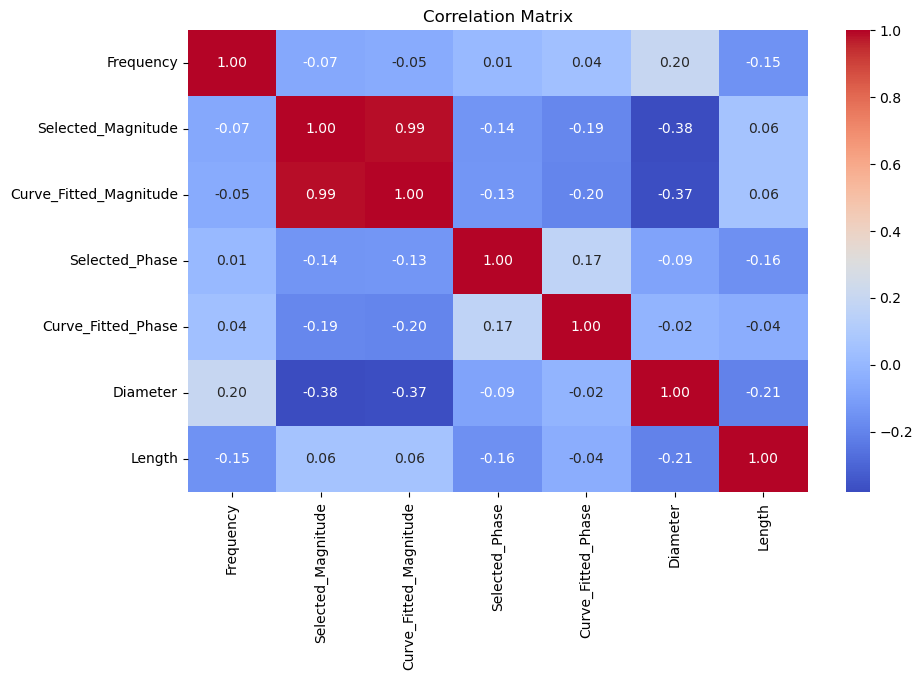

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")


#### There aren't any inputs there are highly correlated with each other, therefore there is no need to eliminate. 

# Machine Learning

In [51]:
!pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.8 MB/s eta 0:00:0000:0100:010m


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [6]:
# Features and target
X = df[['Frequency', 'Diameter', 'Length']]
y = df['Selected_Magnitude']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest

In [56]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


# LSBoost (XGBoost)

In [57]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


In [58]:
def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_xgb, "LSBoost (XGBoost)")


Random Forest - RMSE: 0.2243, R²: 0.6634
LSBoost (XGBoost) - RMSE: 0.2036, R²: 0.7227


### There are rooms for improvements for both algorithm scores. 

#### Grid Search for XGBoost

In [59]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

evaluate(y_test, y_pred_best, "Tuned XGBoost")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Tuned XGBoost - RMSE: 0.2024, R²: 0.7259


#### The R-squared value did not have a significant improvement. 

#### The train score and validation score are plotted to understand potential for improvement.

In [80]:
features = [
    'Frequency', 'Diameter', 'Length']
X = df[features]
y = df['Selected_Magnitude']

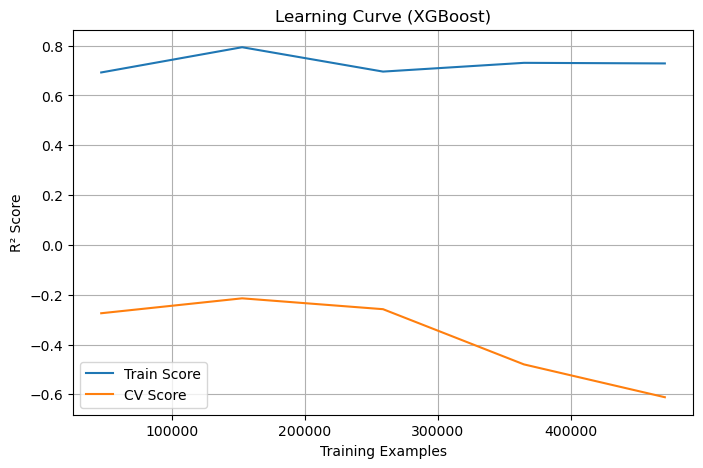

In [68]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    XGBRegressor(n_estimators=100, random_state=42),
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,
    scoring='r2'
)

import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label="Train Score")
plt.plot(train_sizes, test_scores_mean, label="CV Score")
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.title("Learning Curve (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()


#### Train score is acceptable, however CV score is very low and gets lower as the train size increases, therefore the model is overfitting and memorizing the data instead of generalizing. 

## Regularized XGBoost

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    reg_alpha=0.5,
    reg_lambda=0.5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)


In [83]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [84]:
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate_model("XGBoost (Regularized)", y_test, y_pred_xgb)


XGBoost (Regularized) - RMSE: 0.2581, R²: 0.5543


#### It did not improve r-squared value. 

Frequency  Selected_Magnitude  Curve_Fitted_Magnitude  Selected_Phase  \
0        250            0.182186                0.239099      -18.783766   
1        251            0.186790                0.238311      -14.548362   
2        252            0.175381                0.237533      -12.846889   
3        253            0.188000                0.236767      -12.295075   
4        254            0.193568                0.236011      -17.932686   

   Curve_Fitted_Phase  Diameter  Length Accelerometer Test_No  Freq_x_Length  \
0            1.925495        12      50        352A24  Test 2          12500   
1            1.940967        12      50        352A24  Test 2          12550   
2            1.956457        12      50        352A24  Test 2          12600   
3            1.971965        12      50        352A24  Test 2          12650   
4            1.987488        12      50        352A24  Test 2          12700   

   Diam_by_Length  Freq_sq  Accel_Sensitivity  
0            0.24    62500               97.8  
1            0.24    63001               97.8  
2            0.24    63504               97.8  
3            0.24    64009               97.8  
4            0.24    64516               97.8

## Feature Engineering

#### Interaction items were added to the variables set. 

XGBoost with log-transformed target:
RMSE: 0.2060
R²: 0.7162


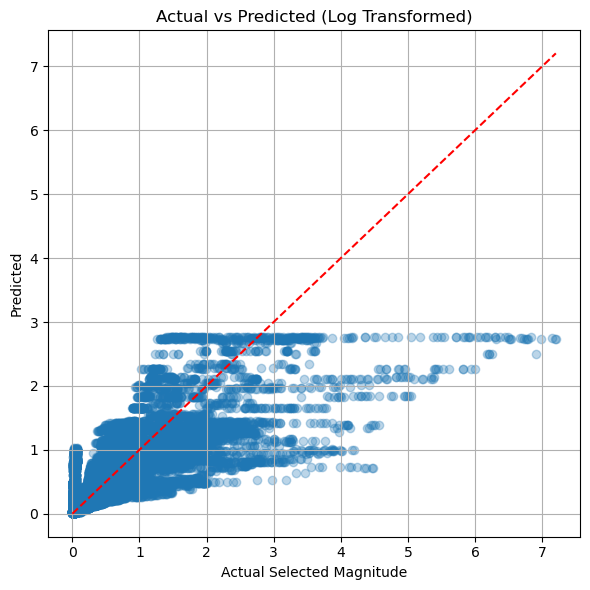

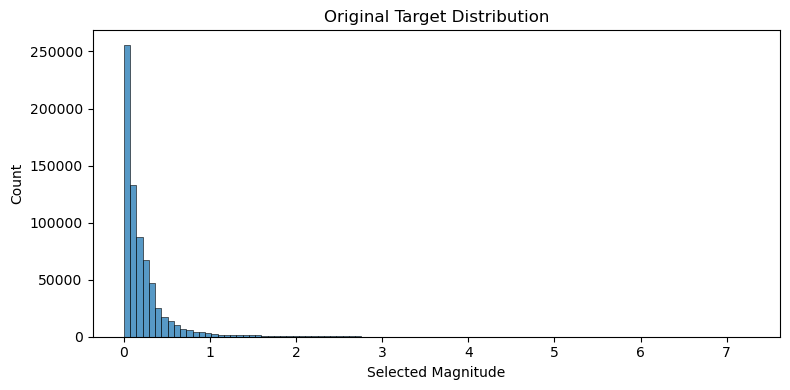

In [148]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature engineering
df['Freq_x_Length'] = df['Frequency'] * df['Length']
df['Diam_by_Length'] = df['Diameter'] / df['Length']
df['Freq_sq'] = df['Frequency'] ** 2

features = [
    'Frequency', 'Diameter', 'Length', 'Freq_x_Length', 'Diam_by_Length', 'Freq_sq'
]

X = df[features].copy()

# ✅ Log-transform the target
y = np.log1p(df['Selected_Magnitude']) 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

model.fit(X_train, y_train)

# Predict and inverse-transform
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # inverse of log1p
y_test_true = np.expm1(y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)

print(f"XGBoost with log-transformed target:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selected Magnitude")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Log Transformed)")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
sns.histplot(y, bins=100)
plt.title("Original Target Distribution")
plt.xlabel("Selected Magnitude")
plt.tight_layout()
plt.show()


#### The prediction power did not improve. 

### Removing Outliers

In [108]:
import pandas as pd

Q1 = df['Selected_Magnitude'].quantile(0.25)
Q3 = df['Selected_Magnitude'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['Selected_Magnitude'] < lower_bound) | (df['Selected_Magnitude'] > upper_bound)


num_outliers = outliers.sum()
total = len(df)
percent_outliers = (num_outliers / total) * 100

print(f"Outliers: {num_outliers} / {total} ({percent_outliers:.2f}%)")


Outliers: 54330 / 706353 (7.69%)


In [11]:
Q1 = df['Selected_Magnitude'].quantile(0.25)
Q3 = df['Selected_Magnitude'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_filtered = df[(df['Selected_Magnitude'] >= lower) & (df['Selected_Magnitude'] <= upper)]

features = [
    'Frequency', 'Diameter', 'Length'
]

X = df_filtered[features].copy()
y = df_filtered['Selected_Magnitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [13]:
def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate(y_test, y_pred_rf, "Random Forest")


Random Forest - RMSE: 0.0683, R²: 0.7510


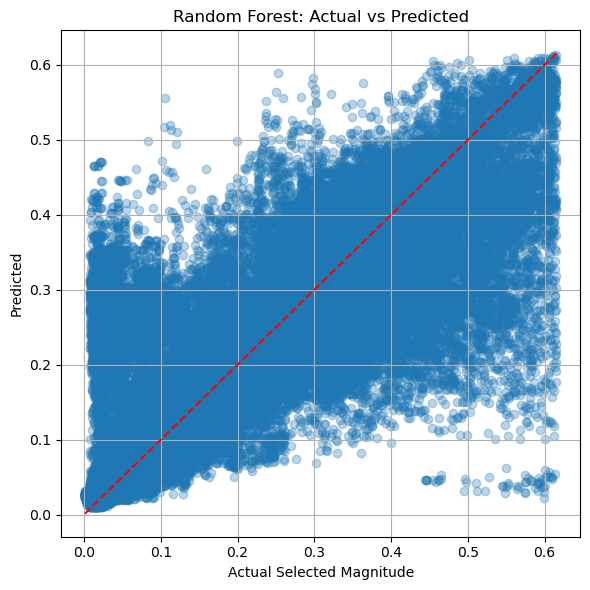

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selected Magnitude")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [113]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


In [114]:
evaluate(y_test, y_pred_xgb, "XGBoost")

XGBoost - RMSE: 0.0618, R²: 0.7965


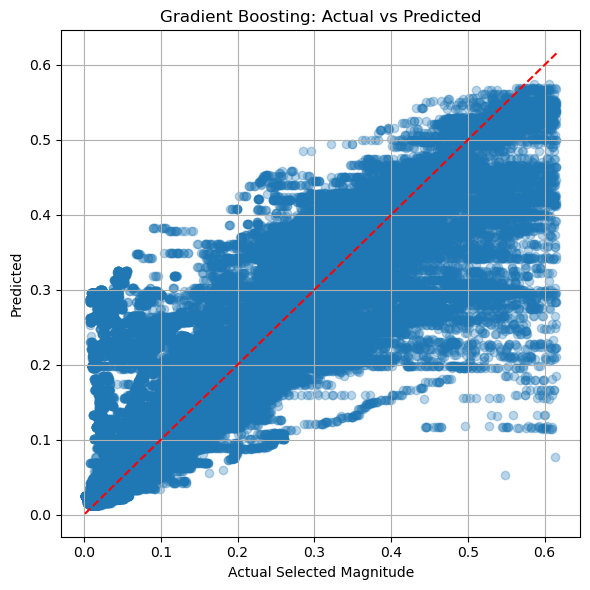

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selected Magnitude")
plt.ylabel("Predicted")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

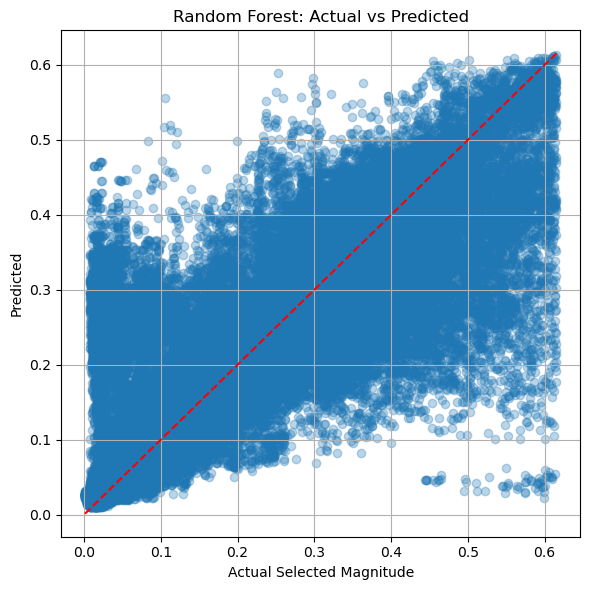

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selected Magnitude")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Both models improved after removing outliers. 

### Accelerometer Sensitivity as a Feature

In [20]:

sensitivity_map = {
    '352A24': 97.8,
    '352C23': 5.63}


df['Accel_Sensitivity'] = df['Accelerometer'].map(sensitivity_map)


In [21]:
features2 = [
    'Frequency', 'Diameter', 'Length',
    'Accel_Sensitivity'
]

X = df[features2].copy()
y = df['Selected_Magnitude']


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate(name, y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate("Random Forest (with sensitivity)", y_test, y_pred_rf)

Random Forest (with sensitivity) - RMSE: 0.1802, R²: 0.7827


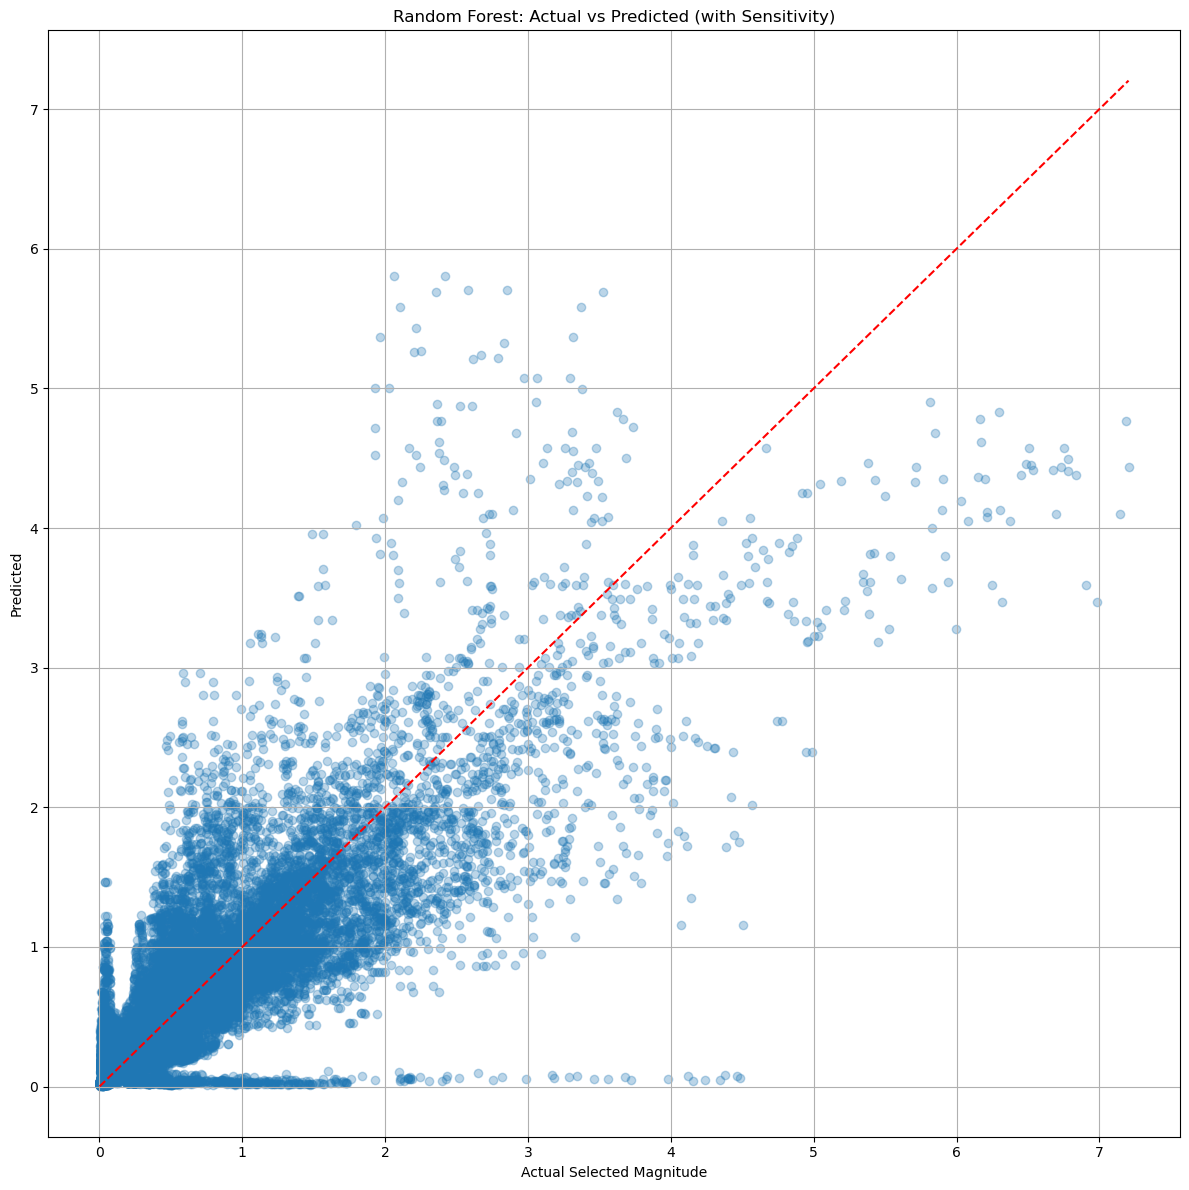

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selected Magnitude")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted (with Sensitivity)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)



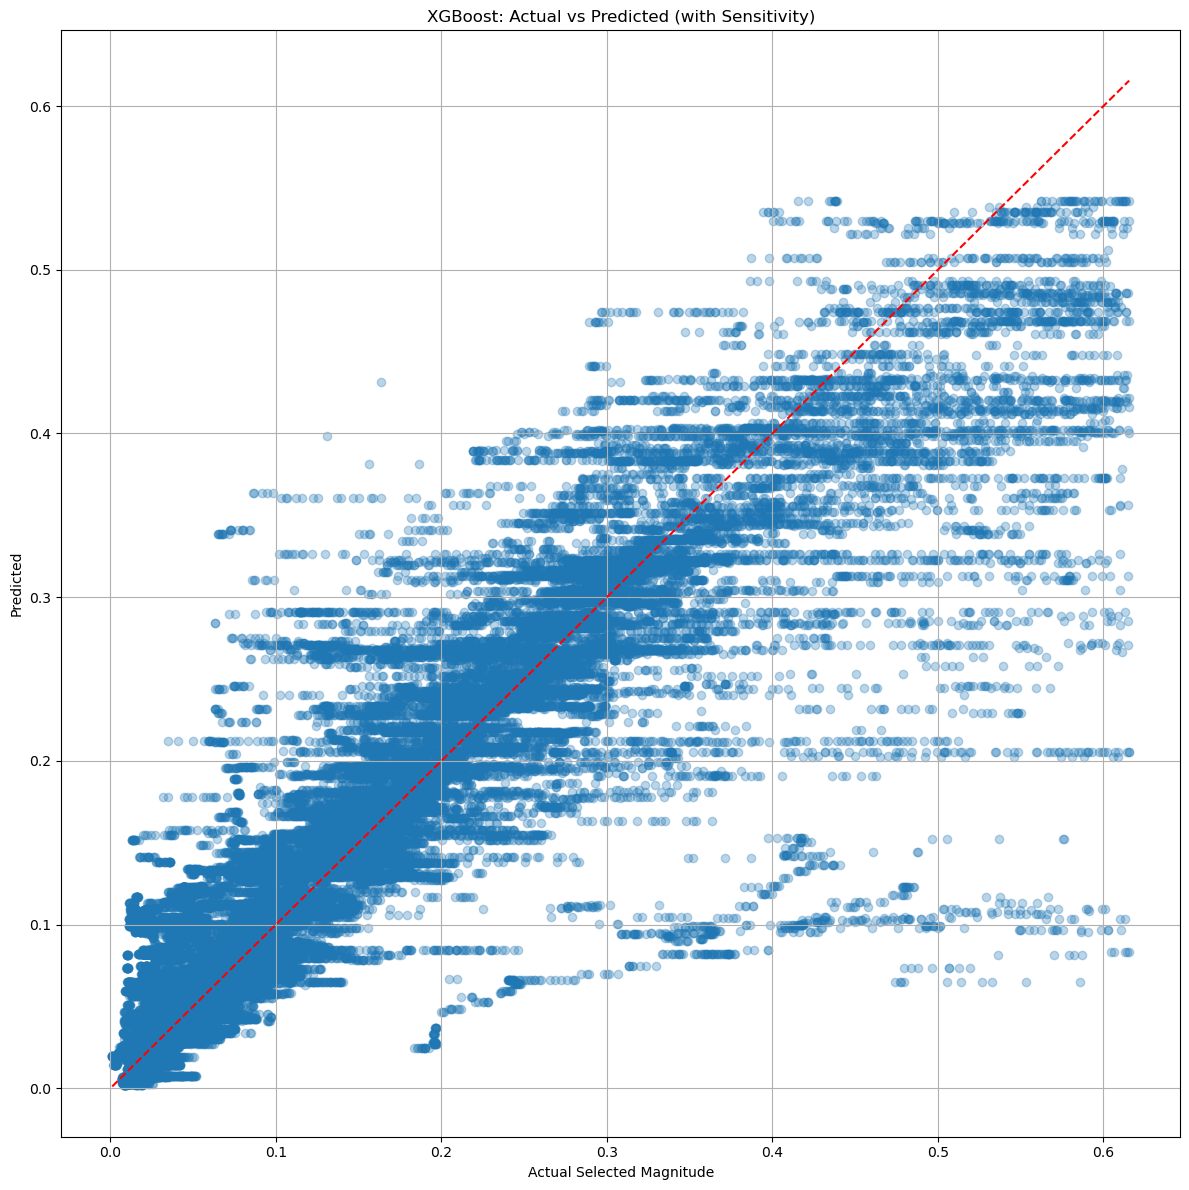

In [70]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selected Magnitude")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted (with Sensitivity)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
evaluate("XGBoost (with sensitivity)", y_test, y_pred_xgb)


XGBoost (with sensitivity) - RMSE: 0.1497, R²: 0.8502


#### Both models improved by adding accelerometer sensitivity as a feature. 

## Training models by seperating according to Accelerometer Model

In [33]:
df_352A24 = df[df['Accelerometer'] == '352A24'].dropna(subset=[
    'Selected_Magnitude', 'Frequency', 'Diameter', 'Length'
])

df_352C23 = df[df['Accelerometer'] == '352C23'].dropna(subset=[
    'Selected_Magnitude', 'Frequency', 'Diameter', 'Length'
])


In [43]:
results = {}

for name, df_acc in [('352A24', df_352A24), ('352C23', df_352C23)]:
    X = df_acc[features]
    y = df_acc['Selected_Magnitude']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'rmse': rmse,
        'r2': r2
    }

    print(f"{name} — Samples: {len(df_acc)} → RMSE: {rmse:.4f}, R²: {r2:.4f}")



352A24 — Samples: 335301 → RMSE: 0.1465, R²: 0.8060
352C23 — Samples: 371052 → RMSE: 0.2084, R²: 0.7593


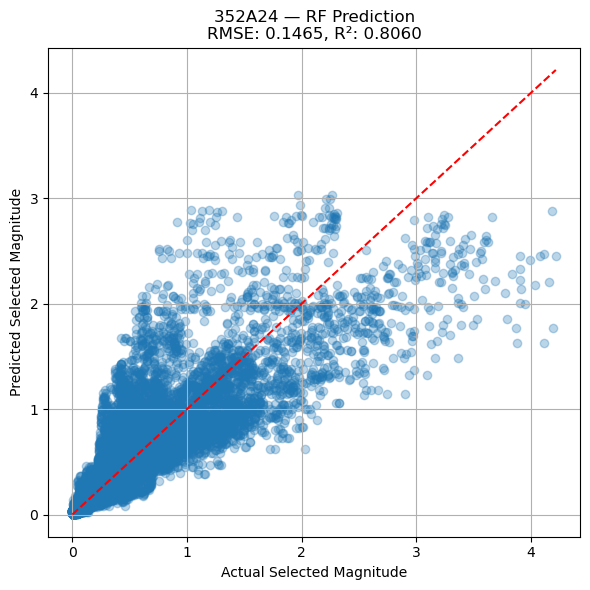

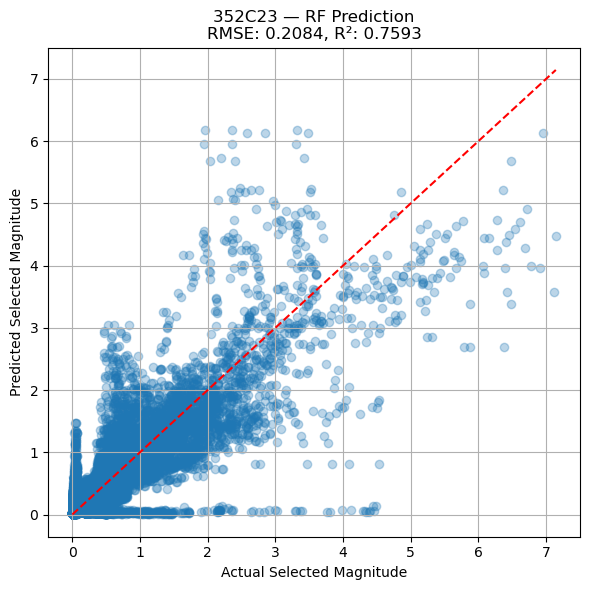

In [44]:
import matplotlib.pyplot as plt

for name, res in results.items():
    y_test = res['y_test']
    y_pred = res['y_pred']
    rmse = res['rmse']
    r2 = res['r2']

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Selected Magnitude")
    plt.ylabel("Predicted Selected Magnitude")
    plt.title(f"{name} — RF Prediction\nRMSE: {rmse:.4f}, R²: {r2:.4f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Random forest prediction improved after the seperation.

In [50]:
xgb_results = {}

for name, df_acc in [('352A24', df_352A24), ('352C23', df_352C23)]:
    X = df_acc[features]
    y = df_acc['Selected_Magnitude']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        random_state=42,
        objective='reg:squarederror'
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    xgb_results[name] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'rmse': rmse,
        'r2': r2
    }

    print(f" {name} — Samples: {len(df_acc)} → RMSE: {rmse:.4f}, R²: {r2:.4f}")


 352A24 — Samples: 335301 → RMSE: 0.1320, R²: 0.8423
 352C23 — Samples: 371052 → RMSE: 0.1935, R²: 0.7926


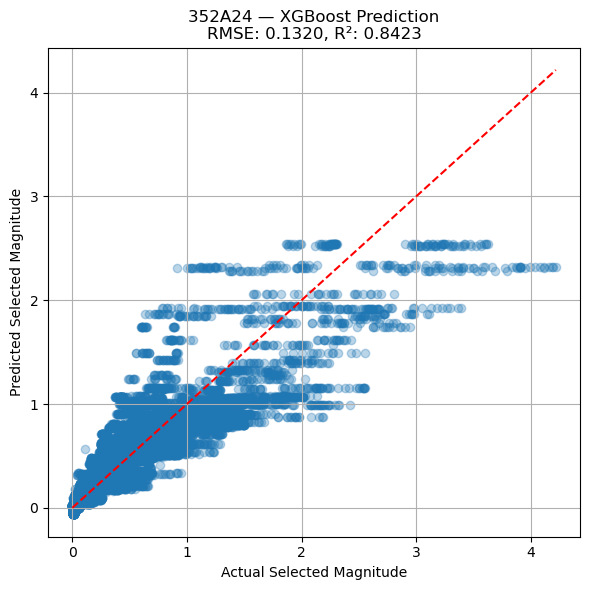

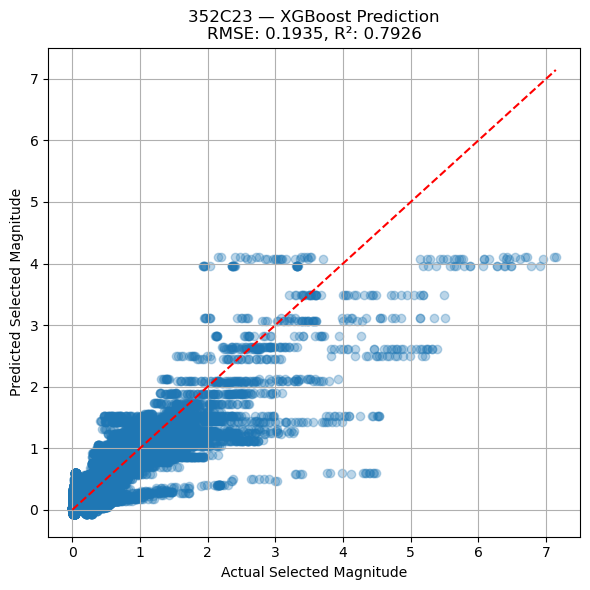

In [71]:
for name, res in xgb_results.items():
    y_test = res['y_test']
    y_pred = res['y_pred']
    rmse = res['rmse']
    r2 = res['r2']

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Selected Magnitude")
    plt.ylabel("Predicted Selected Magnitude")
    plt.title(f"{name} — XGBoost Prediction\nRMSE: {rmse:.4f}, R²: {r2:.4f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### XGBoost Regression improved after the seperation, also by increasing number of estimators to 200. 

## Removing Outliers and Seperating According to Accelerometer Model

In [55]:
Q1 = df['Selected_Magnitude'].quantile(0.25)
Q3 = df['Selected_Magnitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Selected_Magnitude'] >= lower_bound) & (df['Selected_Magnitude'] <= upper_bound)]

print(f"Removed {(1 - len(df_filtered) / len(df)) * 100:.2f}% outliers")

df_352A24 = df_filtered[df_filtered['Accelerometer'] == '352A24'].dropna(subset=[
    'Selected_Magnitude', 'Frequency', 'Diameter', 'Length'
])

df_352C23 = df_filtered[df_filtered['Accelerometer'] == '352C23'].dropna(subset=[
    'Selected_Magnitude', 'Frequency', 'Diameter', 'Length'
])

features = [
    'Frequency', 'Diameter', 'Length',
]
results = {'Random Forest': {}, 'XGBoost': {}}

for name, df_acc in [('352A24', df_352A24), ('352C23', df_352C23)]:
    print(f"\n Training models for Accelerometer: {name} (Samples: {len(df_acc)})")

    X = df_acc[features]
    y = df_acc['Selected_Magnitude']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ---- Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    results['Random Forest'][name] = {'y_test': y_test, 'y_pred': y_pred_rf}

    # ---- XGBoost
    xgb_model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        random_state=42,
        objective='reg:squarederror'
    )
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    results['XGBoost'][name] = {'y_test': y_test, 'y_pred': y_pred_xgb}

    # ---- Print Results
    rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
    r2_xgb = r2_score(y_test, y_pred_xgb)

    print(f"Random Forest → RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
    print(f"XGBoost       → RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}")


Removed 7.69% outliers

 Training models for Accelerometer: 352A24 (Samples: 309428)
Random Forest → RMSE: 0.0437, R²: 0.9046
XGBoost       → RMSE: 0.0418, R²: 0.9127

 Training models for Accelerometer: 352C23 (Samples: 342595)
Random Forest → RMSE: 0.0621, R²: 0.7790
XGBoost       → RMSE: 0.0554, R²: 0.8244


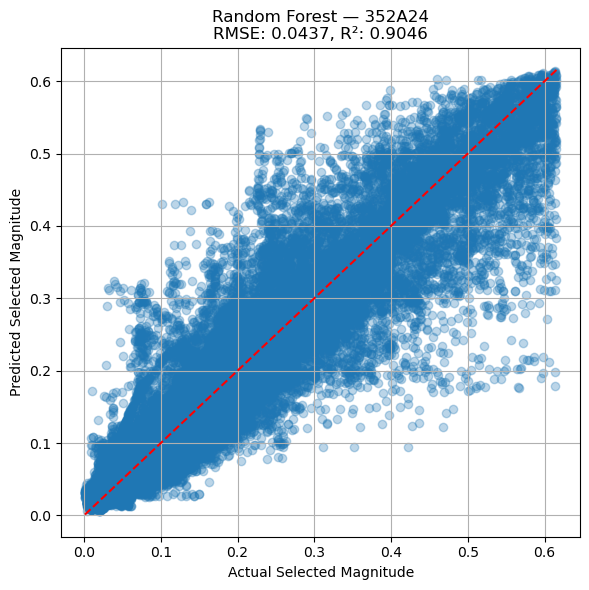

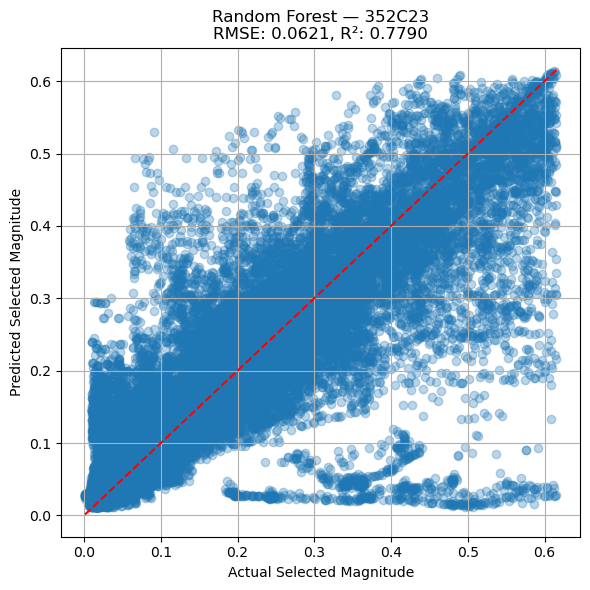

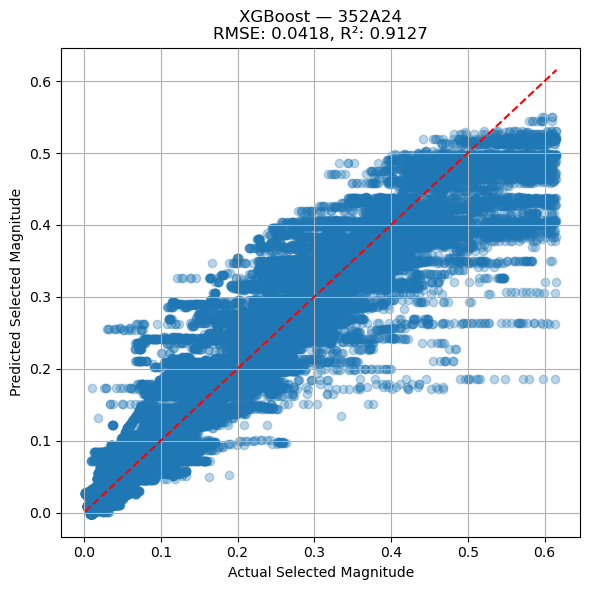

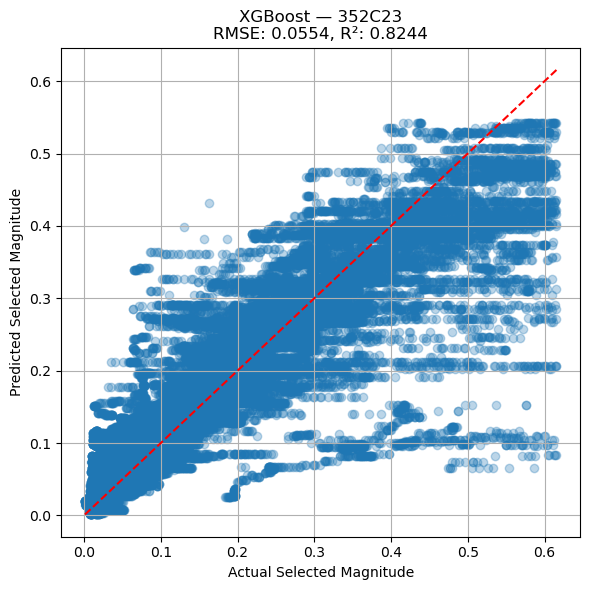

In [66]:
import matplotlib.pyplot as plt

for model_name in ['Random Forest', 'XGBoost']:
    for acc in ['352A24', '352C23']:
        res = results[model_name][acc]
        y_test = res['y_test']
        y_pred = res['y_pred']

        # Calculate metrics
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        # Plot
        plt.figure(figsize=(6, 6))
        plt.scatter(y_test, y_pred, alpha=0.3)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual Selected Magnitude")
        plt.ylabel("Predicted Selected Magnitude")
        plt.title(f"{model_name} — {acc}\nRMSE: {rmse:.4f}, R²: {r2:.4f}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


#### This gave the best score overall. 

## Curve Comparison

/var/folders/j3/bc47st5j1ljdqqhzvq021y640000gn/T/ipykernel_40294/304557996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Frequency'] = pd.to_numeric(df_filtered['Frequency'], errors='coerce')


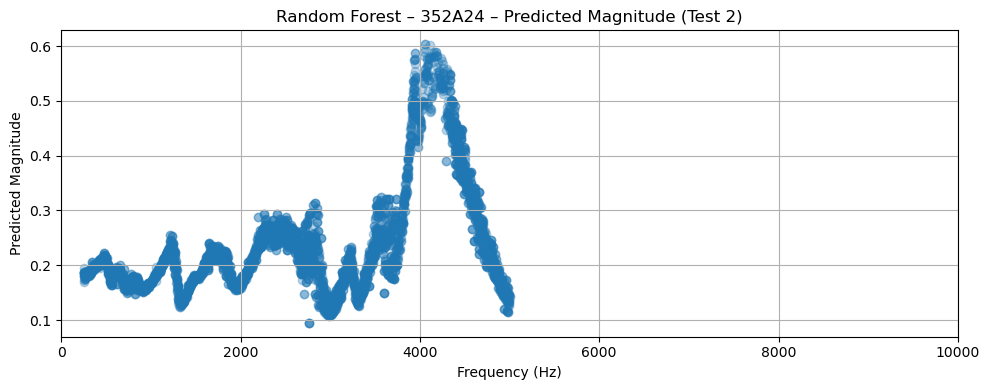

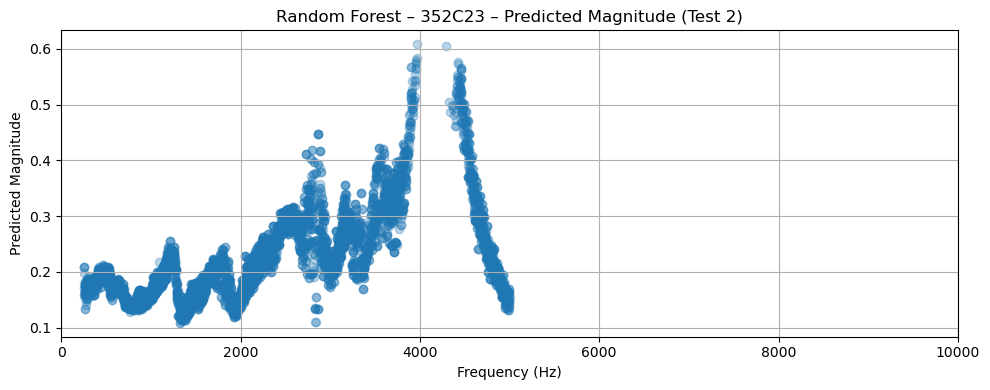

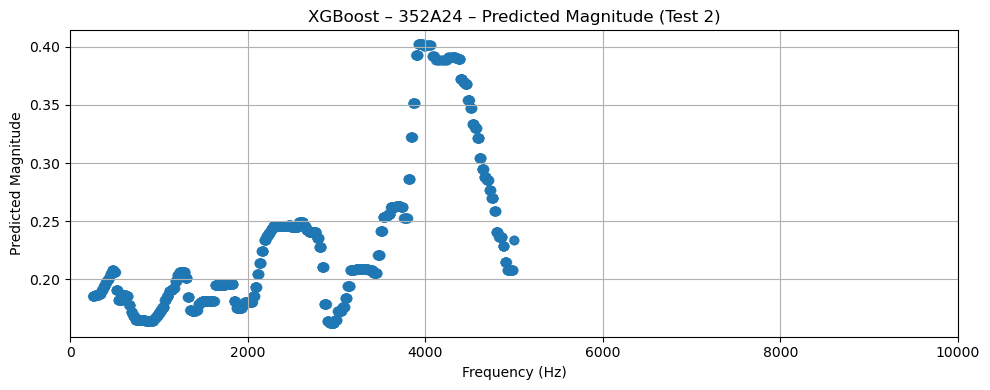

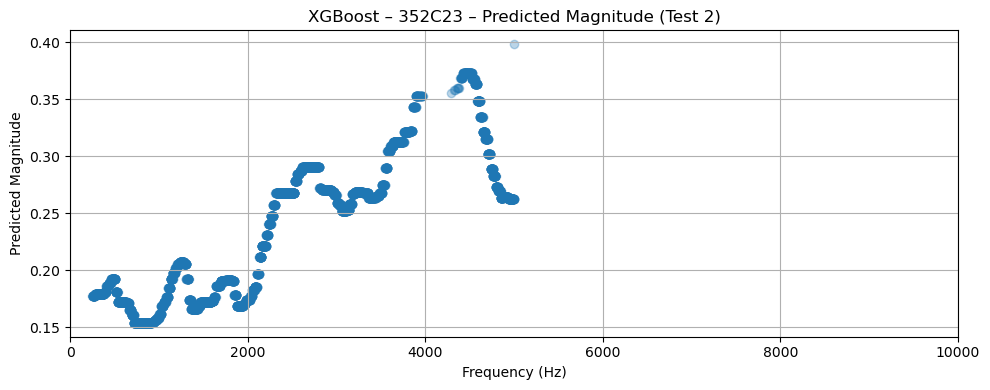

In [68]:
import matplotlib.pyplot as plt

# Ensure Frequency is numeric (in case of formatting issues)
df_filtered['Frequency'] = pd.to_numeric(df_filtered['Frequency'], errors='coerce')

# Loop through both models and accelerometers
for model_name in results:
    for acc in ['352A24', '352C23']:
        y_test = results[model_name][acc]['y_test']
        y_pred = results[model_name][acc]['y_pred']

        # Align with df_filtered
        test_df = df_filtered.loc[y_test.index].copy()
        test_df['Predicted'] = y_pred

        # Filter only Test 2
        test2_df = test_df[test_df['Test_No'] == 'Test 2']

        if len(test2_df) < 10:
            print(f"⚠️ Not enough data for {model_name} – {acc}")
            continue

        # Plot simple scatter: Frequency vs Predicted
        plt.figure(figsize=(10, 4))
        plt.scatter(test2_df['Frequency'], test2_df['Predicted'], alpha=0.3, label='Predicted')
        plt.title(f"{model_name} – {acc} – Predicted Magnitude (Test 2)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Predicted Magnitude")
        plt.xlim(0, 10000)  # Set x-axis to 0–10000 as requested
        plt.grid(True)
        plt.tight_layout()
        plt.show()




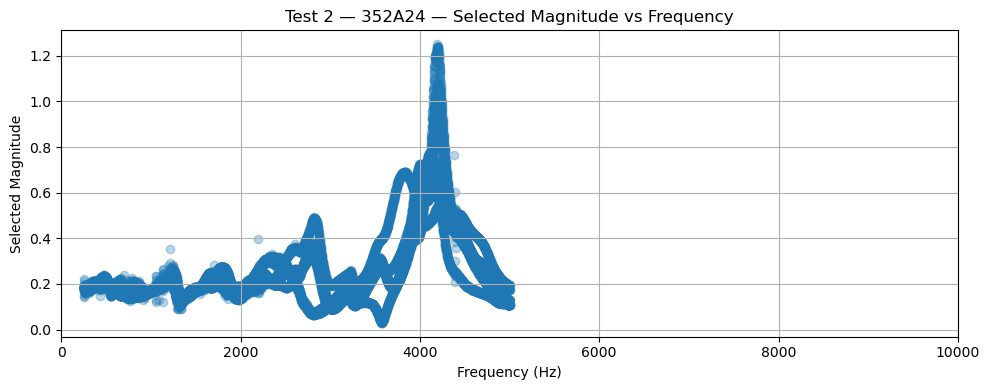

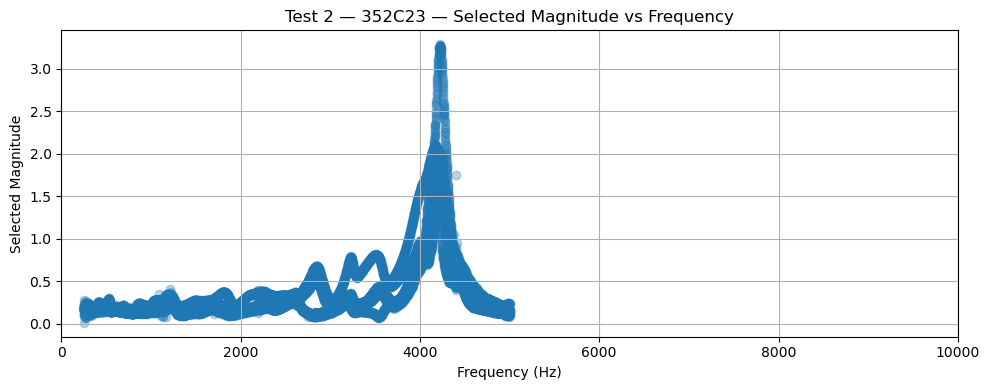

In [69]:

test2_df = df[df['Test_No'] == 'Test 2'].dropna(subset=['Selected_Magnitude', 'Frequency', 'Accelerometer'])

# Ensure Frequency and Magnitude are numeric
test2_df['Frequency'] = pd.to_numeric(test2_df['Frequency'], errors='coerce')
test2_df['Selected_Magnitude'] = pd.to_numeric(test2_df['Selected_Magnitude'], errors='coerce')

# Plot separately for each accelerometer
for acc in ['352A24', '352C23']:
    acc_df = test2_df[test2_df['Accelerometer'] == acc]

    if len(acc_df) < 10:
        print(f"⚠️ Not enough data for Accelerometer {acc}")
        continue

    plt.figure(figsize=(10, 4))
    plt.scatter(acc_df['Frequency'], acc_df['Selected_Magnitude'], alpha=0.3)
    plt.title(f"Test 2 — {acc} — Selected Magnitude vs Frequency")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Selected Magnitude")
    plt.xlim(0, 10000)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
